In [ ]:
import numpy as np

for i in range( 100 ):
    print( np.random.choice(a=5, size=3, replace=False, p=[0.1, 0.1, 0.4, 0.4, 0.0]) )

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

def get_positional_encoding( max_seq_len, embed_dim ):
    positional_encoding = np.array( [
        [ pos / np.power( 10000, 2 * i / embed_dim ) for i in range( embed_dim ) ]
        if pos != 0 else np.zeros( embed_dim ) for pos in range( max_seq_len ) ]
    )
    positional_encoding[ 1:, 0::2 ] = np.sin( positional_encoding[ 1:, 0::2 ] )  # dim 2i 偶数
    positional_encoding[ 1:, 1::2 ] = np.cos( positional_encoding[ 1:, 1::2 ] )  # dim 2i+1 奇数
    # 归一化, 用位置嵌入的每一行除以它的模长
    # denominator = np.sqrt(np.sum(position_enc**2, axis=1, keepdims=True))
    # position_enc = position_enc / (denominator + 1e-8)
    return positional_encoding

Text(69.0, 0.5, 'sequence length')

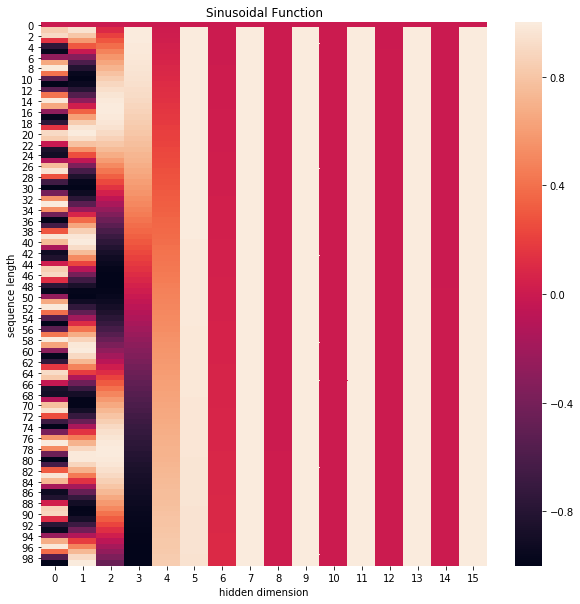

In [24]:
positional_encoding = get_positional_encoding( max_seq_len= 100, embed_dim=16 )
plt.figure( figsize=( 10, 10 ) )
sns.heatmap( positional_encoding )
plt.title( 'Sinusoidal Function' )
plt.xlabel( 'hidden dimension' )
plt.ylabel( 'sequence length' )

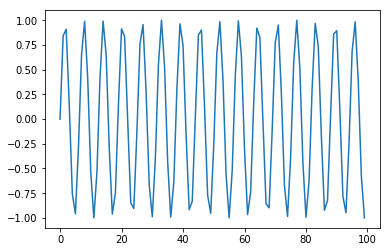

In [41]:
plt.plot( positional_encoding[ :, 0] )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

def expand(mi, mx):
    inter = (mx - mi) * 0.05
    return mi-inter, mx+inter

x_min, x_max = expand(-5, 5)
y_min, y_max = expand(0, 25)

fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.axis([x_min, x_max, y_min, y_max])    # 固定 X 轴和 Y 轴坐标范围
plt.ion()                                # 连续动态图

# 初始化 (x, y) 坐标
pre_x = -5 
pre_y = pre_x ** 2

for _ in range(100):                    # 以 0.1 的步长更新 x，绘制 y=x**2 的动态图
    cur_x = pre_x + 0.1
    cur_y = cur_x ** 2
    
    ax.plot([pre_x, cur_x], [pre_y, cur_y], 'r-')
    plt.pause(0.1)                       # 每次绘制后暂停 0.1 秒
    
    pre_x, pre_y = cur_x, cur_y

Using matplotlib backend: Qt5Agg
